In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
figsize_L = (14,12)

In [2]:
# measuremnts 
labels = open("low_freq/house_1/labels.dat").read()
print labels
n_channels = labels.count('\n')

1 mains
2 mains
3 oven
4 oven
5 refrigerator
6 dishwaser
7 kitchen_outlets
8 kitchen_outlets
9 lighting
10 washer_dryer
11 microwave
12 bathroom_gfi
13 electric_heat
14 stove
15 kitchen_outlets
16 kitchen_outlets
17 lighting
18 lighting
19 washer_dryer
20 washer_dryer



In [3]:
labels = pd.read_table('low_freq/house_1/labels.dat', sep=' ', index_col=0, header=None)
labels.columns = ['label']

'mains'

In [21]:
list_dfs = []
for i_channel in range(1,n_channels+1):
    file_name = 'low_freq/house_1/channel_{}.dat'.format(i_channel)
    df = pd.read_table(file_name, sep=' ', header=None, index_col=0)
    df.columns = [labels.ix[i_channel, 'label']]
    df = df.set_index(pd.to_datetime(df.index, unit='s'))
    list_dfs.append(df)
del df

In [27]:
df = pd.concat(list_dfs, axis=1)
df = df.resample('1min').mean()
#del list_dfs

In [29]:
df.columns

Index([u'mains', u'mains', u'oven', u'oven', u'refrigerator', u'dishwaser',
       u'kitchen_outlets', u'kitchen_outlets', u'lighting', u'washer_dryer',
       u'microwave', u'bathroom_gfi', u'electric_heat', u'stove',
       u'kitchen_outlets', u'kitchen_outlets', u'lighting', u'lighting',
       u'washer_dryer', u'washer_dryer'],
      dtype='object')

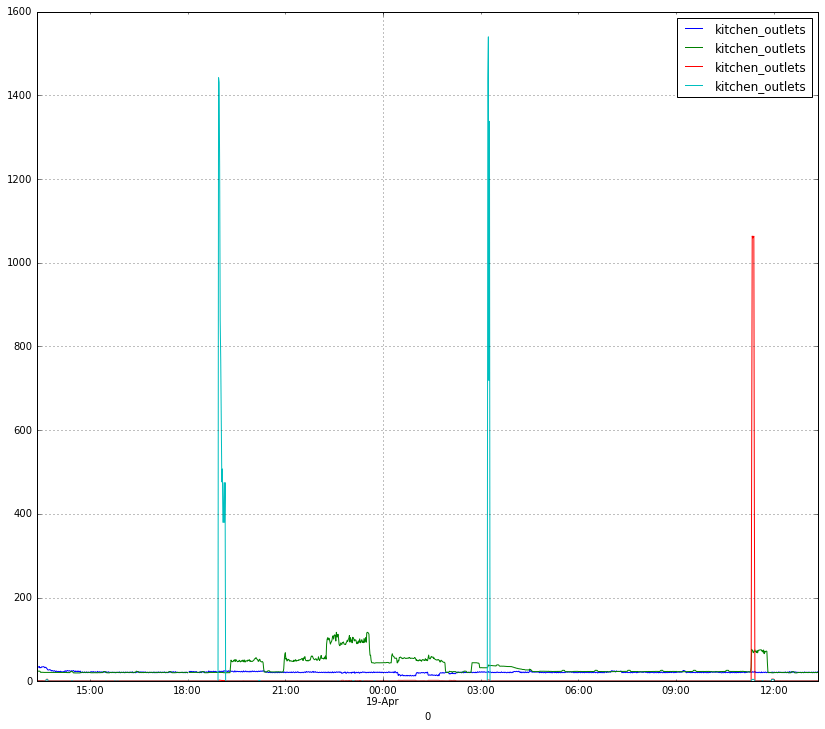

In [30]:
df.ix[0:60*24, ['kitchen_outlets']].plot(figsize=(14,12), grid=True)